# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='fashion_valley'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
agency_cd,string,Source agency. Always “USGS”
site_no,integer,"Site number, always “11023000”"
datetime,date,"Reading date, in ISO format."
discharge_rate,number,"Mean discharge, in cubic feet per second ( USGS Parameter 7745_00060_00003 )"
qualification_code,string,"A=Approved, e= Estimated, P=Provisional"


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,agency_cd,site_no,datetime,discharge_rate,qualification_code
0,USGS,11023000,1988-01-01,22.0,A
1,USGS,11023000,1988-01-02,20.0,A
2,USGS,11023000,1988-01-03,18.0,A
3,USGS,11023000,1988-01-04,18.0,A
4,USGS,11023000,1988-01-05,21.0,A


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,2
datetime,1
number,1
other,1


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0
agency_cd,USGS
site_no,11023000


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 1 columns):
datetime    11162 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 87.3 KB


None

,count,unique,top,freq,first,last
datetime,11162,11162,1989-12-27 00:00:00,1,1988-01-01 00:00:00,2018-07-23 00:00:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 1 columns):
discharge_rate    11162 non-null float64
dtypes: float64(1)
memory usage: 87.3 KB


None

,count,mean,std,min,25%,50%,75%,max
discharge_rate,11162.0,33.066923,155.931902,0.0,1.76,5.47,16.0,5800.0


In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].fillna(0),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        


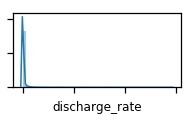

In [14]:
plot_histograms(df[number_col_names])

# Other Columns

In [15]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 1 columns):
qualification_code    11162 non-null object
dtypes: object(1)
memory usage: 87.3+ KB


None

,count,unique,top,freq
qualification_code,11162,3,A,10813
